In [2]:
import pandas as pd
import cv2 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
#paths to the images on my computer
image_paths = [
        "C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/Birds_to_label/American-robin.PNG",
        "C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/Birds_to_label/Cardinal.PNG",
        "C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/Birds_to_label/Sparrow.PNG"
    ]
#Reading the image
robin_image = cv2.imread("C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/Birds_to_label/American-robin.PNG") 
cardinal_image = cv2.imread("C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/Birds_to_label/Cardinal.PNG") 
sparrow_image = cv2.imread("C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/Birds_to_label/Sparrow.PNG") 

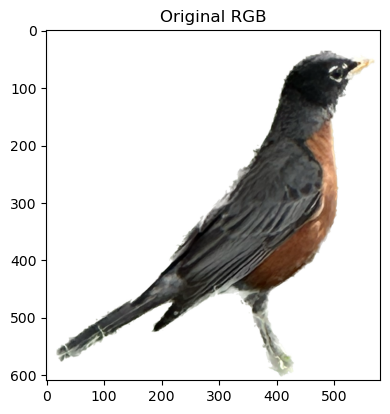

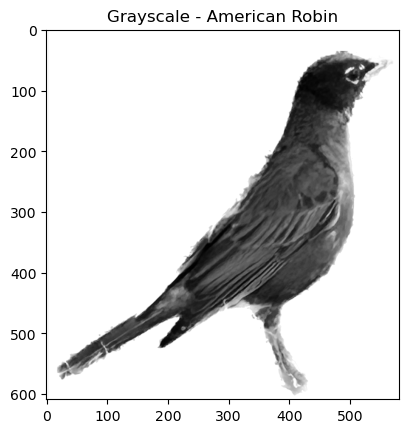

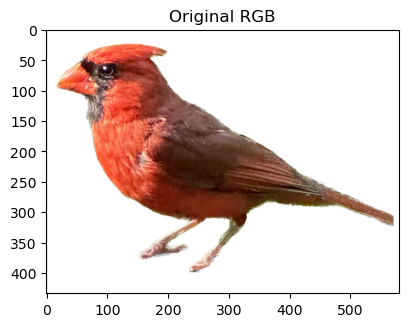

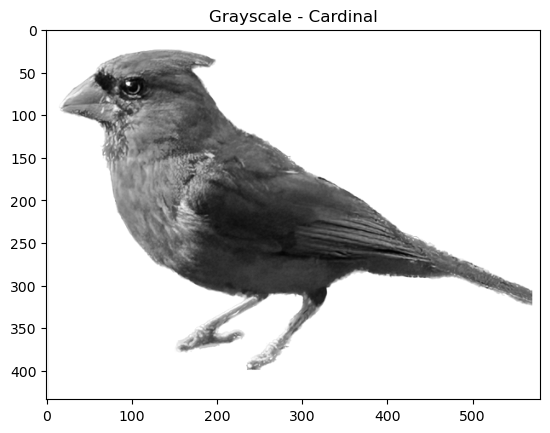

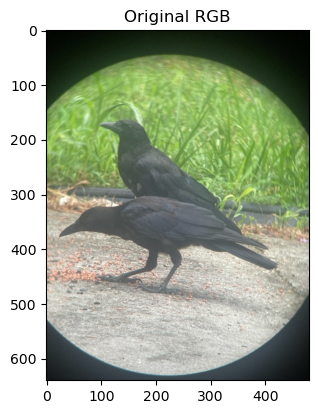

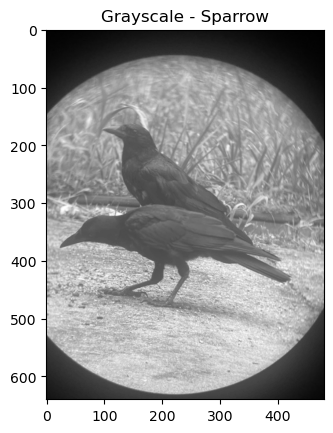

In [4]:
images = [("American Robin", robin_image), ("Cardinal", cardinal_image), ("Sparrow", sparrow_image)]

for title, image in images:
    B, G, R = cv2.split(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original RGB')

    plt.show()

    plt.figure()
    plt.imshow(gray, cmap='gray')
    plt.title(f'Grayscale - {title}')
    plt.show()


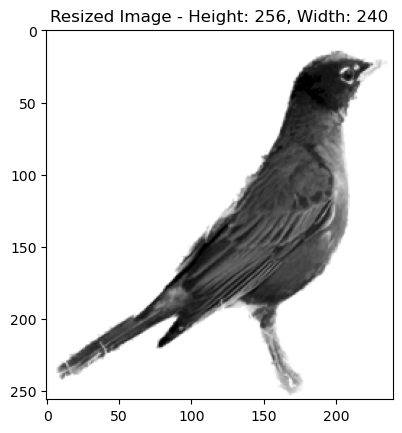

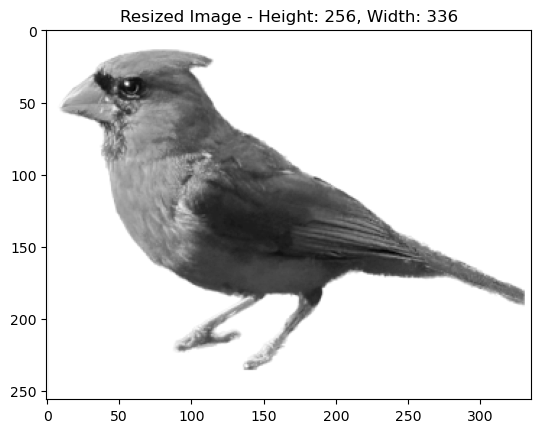

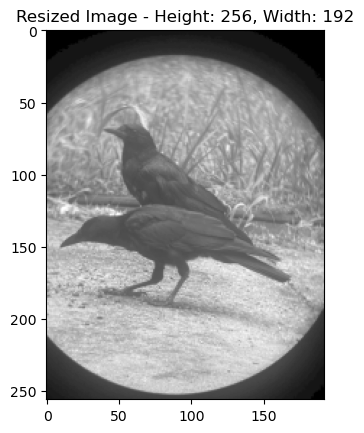

In [5]:
def resize_images():

    resized_images = []
    for path in image_paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        height, width = image.shape
        new_height = 256
        aspect_ratio = width / height
        new_width = int((new_height * aspect_ratio) // 16) * 16

        resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
        resized_images.append(resized_image)

        plt.imshow(resized_image, cmap='gray')
        plt.title(f'Resized Image - Height: {new_height}, Width: {new_width}')
        plt.show()

    return resized_images

resized_images = resize_images()

In [6]:
block_size = 16
all_feature_vectors = []
labels = []

# Loop over each image and generate features
for idx, image in enumerate(resized_images):
    height, width = image.shape
    feature_vectors = []

    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i+block_size, j:j+block_size]
            feature_vector = block.flatten()
            feature_vectors.append(feature_vector)
    
    all_feature_vectors.extend(feature_vectors)
    labels.extend([idx] * len(feature_vectors))

# Save to CSV function
df = pd.DataFrame(all_feature_vectors)
df['label'] = labels
df.to_csv('C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/block_feature_vectors.csv', index=False)


In [7]:
block_size = 16
step = 8
all_feature_vectors = []
labels = []

# Loop over each image and generate features
for idx, image in enumerate(resized_images):
    height, width = image.shape
    feature_vectors = []


#Sliding block should create more vectors than the previous method because this one doesn't care about overlapping. 
    for i in range(0, height - block_size + 1, step):
        for j in range(0, width - block_size + 1, step):
            block = image[i:i+block_size, j:j+block_size]
            feature_vector = block.flatten()
            feature_vectors.append(feature_vector)

    all_feature_vectors.extend(feature_vectors)
    labels.extend([idx] * len(feature_vectors))

# Save to CSV
df = pd.DataFrame(all_feature_vectors)
df['label'] = labels
df.to_csv('C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/sliding_block_feature_vectors.csv', index=False)


In [ ]:
df = pd.read_csv('block_feature_vectors.csv')

num_observations = df.shape[0]
num_features = df.shape[1] - 1
mean_values = df.mean()
std_values = df.std()

print("Number of Observations:", num_observations)
print("Number of Features:", num_features)
print("Mean of Each Feature:\n", mean_values)
print("Standard Deviation of Each Feature:\n", std_values)

labels = df['label'].unique()
for label in labels:
    label_data = df[df['label'] == label]
    mean_feature_values = label_data.iloc[:, :-1].mean(axis=0)

    plt.figure()
    plt.hist(mean_feature_values, bins=30, alpha=0.7)
    plt.title(f'Histogram of Mean Feature Values')
    plt.xlabel('Mean Feature Value')
    plt.ylabel('Frequency')
    plt.show()




In [9]:
df1 = pd.read_csv('C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/block_feature_vectors.csv')
df2 = pd.read_csv('C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/sliding_block_feature_vectors.csv')

merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

merged_df.to_csv('C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/merged_featurespace.csv', index=False)

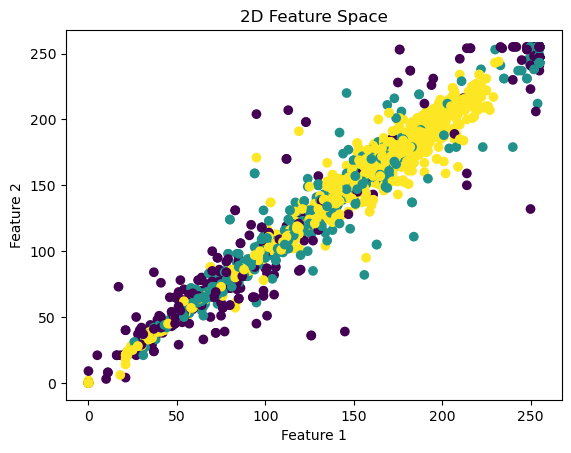

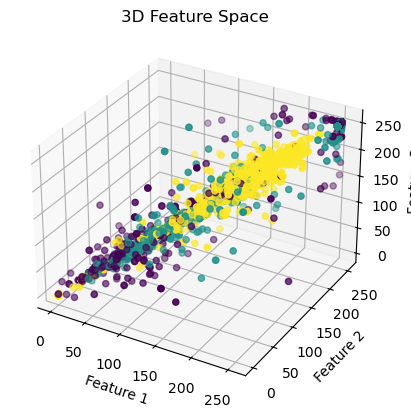

In [10]:
df = pd.read_csv('C:/Users/sreye/OneDrive/Desktop/birdsDataset-main/merged_featurespace.csv')

plt.figure()
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['label'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Feature Space')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['label'], cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Feature Space')
plt.show()

